<a href="https://colab.research.google.com/github/ezzatmostafa96/Action-Recognition-in-Real-Time/blob/master/30MayPostProcessing_InceptionV3_Done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g6n-V7Od-RRkR_GX2Ze3RRx14SAnNU3B3w4LZSjb8R7GSQi5Fy_cmg
Mounted at /content/drive


In [ ]:
!unzip /content/drive/My\ Drive/er1.zip -d /content
!unzip /content/drive/My\ Drive/er2.zip -d /content
!unzip /content/drive/My\ Drive/er3.zip -d /content

Archive:  /content/drive/My Drive/er1.zip
   creating: /content/content/Normal/test/
  inflating: /content/content/Normal/test/D_Normal_Videos_722_x264-401.jpg  
  inflating: /content/content/Normal/test/A_Explosion046_x264-393.jpg  
  inflating: /content/content/Normal/test/D_Normal_Videos_634_x264-197.jpg  
  inflating: /content/content/Normal/test/A_Explosion046_x264-6114.jpg  
  inflating: /content/content/Normal/test/D_Normal_Videos_696_x264-150.jpg  
  inflating: /content/content/Normal/test/B_Fighting041_x264-2084.jpg  
  inflating: /content/content/Normal/test/A_Explosion046_x264-10629.jpg  
  inflating: /content/content/Normal/test/D_Normal_Videos_722_x264-418.jpg  
  inflating: /content/content/Normal/test/A_Explosion046_x264-6259.jpg  
  inflating: /content/content/Normal/test/B_Fighting025_x264-375.jpg  
  inflating: /content/content/Normal/test/B_Fighting024_x264-170.jpg  
  inflating: /content/content/Normal/test/B_Fighting025_x264-262.jpg  
  inflating: /content/content/

In [ ]:
import os

paths = (os.path.join(root, filename)
        for root, _, filenames in os.walk('/content/content/Normal')
        for filename in filenames)

for path in paths:
    # the '#' in the example below will be replaced by the '-' in the filenames in the directory
    newname = path.replace('C', 'A')
    if newname != path:
        os.rename(path, newname)

import os

paths = (os.path.join(root, filename)
        for root, _, filenames in os.walk('/content/content/Normal')
        for filename in filenames)

for path in paths:
    # the '#' in the example below will be replaced by the '-' in the filenames in the directory
    newname = path.replace('B', 'A')
    if newname != path:
        os.rename(path, newname)


import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images
from sklearn.model_selection import train_test_split
from glob import glob
from tqdm import tqdm
import keras
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import save_img
##########################################################

path_train = "/content/content/Normal/train"
frames = os.listdir(path_train)
target_labels =[]
for i in frames:
  if i.split('_')[0] == 'A':
    target_labels.append(0)
  elif i.split('_')[0] == 'D':
    target_labels.append(1)
  
        
path_test = "/content/content/Normal/test"
framestest = os.listdir(path_test)
test_labels =[]
for i in framestest:
  if i.split('_')[0] == 'A':
    test_labels.append(0)
  elif i.split('_')[0] == 'D':
    test_labels.append(1)
  

path_validate = "/content/content/Normal/val"
framesval = os.listdir(path_validate)
val_labels =[]
for i in framesval:
  if i.split('_')[0] == 'A':
    val_labels.append(0)
  elif i.split('_')[0] == 'D':
    val_labels.append(1)
  ##########################################################

path_validate = "/content/content/Normal/train"
framesval = (os.listdir(path_validate))
len(framesval)

df = pd.DataFrame(target_labels)
pd.value_counts(df.values.flatten())


path_validate = "/content/content/Normal/test"
framesval = (os.listdir(path_validate))
len(framesval)
df = pd.DataFrame(test_labels)
pd.value_counts(df.values.flatten())

path_validate = "/content/content/Normal/test"
framesval = (os.listdir(path_validate))
len(framesval)
df = pd.DataFrame(val_labels)
pd.value_counts(df.values.flatten())

import glob
import numpy as np
import os
import shutil

import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline


images = glob.glob('/content/content/Normal/train/*')
print(images)


train_data = np.array([img_to_array(load_img(img, target_size=(300, 300)))
                           for img in images
                      ]).astype('float32')
train_data /= 255

array_to_img(train_data[434])

images = glob.glob('/content/content/Normal/test/*')
print(images)
print(len(images))

test_data = np.array([img_to_array(load_img(img, target_size=(300, 300)))
                           for img in images
                      ]).astype('float32')
test_data /= 255


array_to_img(test_data[5])

images = glob.glob('/content/content/Normal/val/*')
print(images)
print(len(images))

val_data = np.array([img_to_array(load_img(img, target_size=(300, 300)))
                           for img in images
                      ]).astype('float32')
val_data /= 255


array_to_img(val_data[5])

print("Train shape: ", train_data.shape)
print("Test shape: ", test_data.shape)
print("validate shape: ", val_data.shape)
val_labels = np.array(val_labels)
target_labels = np.array(target_labels)
test_labels = np.array(test_labels)
print(val_labels.shape)
print(test_labels.shape)
print(target_labels.shape)
from keras.utils.np_utils import to_categorical
train_label = to_categorical(target_labels)
test_label = to_categorical(test_labels)
val_label = to_categorical(val_labels)
print(val_label.shape)
print(test_label.shape)
print(train_label.shape)

from keras.layers import Dense, Flatten, Dropout, ZeroPadding3D
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import TimeDistributed
from keras.layers.convolutional import (Conv2D, MaxPooling3D, Conv3D,
    MaxPooling2D)
from collections import deque
import sys
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense



['/content/content/Normal/train/A_Explosion030_x264-13.jpg', '/content/content/Normal/train/A_Shooting033_x264-199.jpg', '/content/content/Normal/train/A_Explosion046_x264-13137.jpg', '/content/content/Normal/train/A_Explosion046_x264-9436.jpg', '/content/content/Normal/train/A_Fighting022_x264-204.jpg', '/content/content/Normal/train/D_Normal_Videos_634_x264-973.jpg', '/content/content/Normal/train/A_Shooting009_x264-146.jpg', '/content/content/Normal/train/A_Explosion013_x264-140.jpg', '/content/content/Normal/train/A_Explosion004_x264-160.jpg', '/content/content/Normal/train/A_Shooting042_x264-90.jpg', '/content/content/Normal/train/A_Shooting036_x264-113.jpg', '/content/content/Normal/train/A_Shooting042_x264-35.jpg', '/content/content/Normal/train/D_Normal_Videos_352_x264-489.jpg', '/content/content/Normal/train/D_Normal_Videos_634_x264-492.jpg', '/content/content/Normal/train/D_Normal_Videos_050_x264-121.jpg', '/content/content/Normal/train/D_Normal_Videos_696_x264-50.jpg', '/con

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np

!pip install efficientnet
import efficientnet.keras as efn 

base_inception = InceptionV3(weights='imagenet', include_top=False, 
                             input_shape=(300,300,3)) 
base_inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
X_train = base_inception.predict(train_data)
X_train.shape
X_test = base_inception.predict(test_data)
X_test.shape
X_val = base_inception.predict(val_data)
X_val.shape

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(2200, 8, 8, 2048)
(450, 8, 8, 2048)
(450, 8, 8, 2048)


In [ ]:
X_train = X_train.reshape(2200, 8 * 8, 2048)
X_test = X_test.reshape(450,8 * 8, 2048)
X_val = X_val.reshape(450, 8 * 8, 2048)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


(2200, 64, 2048)
(450, 64, 2048)
(450, 64, 2048)


In [ ]:
import tensorflow as tf
model = Sequential()
model.add(LSTM(2048, return_sequences=False, input_shape=(8 * 8, 2048),dropout=0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

from keras.callbacks import ModelCheckpoint
mcp_save = ModelCheckpoint('weight_Xception_new.hdf5', save_best_only=True, monitor='val_loss', mode='min')
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=[tf.keras.metrics.AUC(curve="ROC"),'accuracy'])

In [ ]:
history = model.fit(X_train, train_label, epochs=100 , validation_data=(X_val, val_label), callbacks=[mcp_save], batch_size=64)

Epoch 1/100
35/35 [==============================] - 46s 736ms/step - loss: 0.8341 - auc: 0.6587 - accuracy: 0.6680 - val_loss: 0.1557 - val_auc: 0.8741 - val_accuracy: 0.9333
Epoch 2/100
35/35 [==============================] - 25s 719ms/step - loss: 0.1166 - auc: 0.9111 - accuracy: 0.9591 - val_loss: 0.1812 - val_auc: 0.9555 - val_accuracy: 0.9356
Epoch 3/100
35/35 [==============================] - 25s 729ms/step - loss: 0.0828 - auc: 0.9617 - accuracy: 0.9741 - val_loss: 0.0218 - val_auc: 0.9756 - val_accuracy: 0.9911
Epoch 4/100
35/35 [==============================] - 25s 723ms/step - loss: 0.0204 - auc: 0.9791 - accuracy: 0.9942 - val_loss: 0.0268 - val_auc: 0.9852 - val_accuracy: 0.9889
Epoch 5/100
35/35 [==============================] - 25s 717ms/step - loss: 0.0177 - auc: 0.9868 - accuracy: 0.9953 - val_loss: 0.0188 - val_auc: 0.9896 - val_accuracy: 0.9956
Epoch 6/100
35/35 [==============================] - 25s 723ms/step - loss: 0.0055 - auc: 0.9906 - accuracy: 0.9973 - va

In [ ]:
!unzip /content/drive/MyDrive/3May_train.zip -d /content

from sklearn.model_selection import cross_val_score
from sklearn import metrics

from random import sample

files = os.listdir('/content/content/train_new')
for file in sample(files,7800):
    os.remove('/content/content/train_new/' + file)

path_test = "/content/content/train_new"
framestest = os.listdir(path_test)
test_labels =[]
for i in framestest:
  if i.split('_')[0] == 'A':
    test_labels.append(0)
  elif i.split('_')[0] == 'D':
    test_labels.append(1)
  

Streaming output truncated to the last 5000 lines.
  inflating: /content/content/train_new/A_Shooting006_x264-1179.jpg  
  inflating: /content/content/train_new/A_Shooting022_x264-69.jpg  
  inflating: /content/content/train_new/A_Explosion046_x264-11414.jpg  
  inflating: /content/content/train_new/A_Explosion046_x264-8333.jpg  
  inflating: /content/content/train_new/A_Explosion046_x264-6075.jpg  
  inflating: /content/content/train_new/A_Explosion041_x264-161.jpg  
  inflating: /content/content/train_new/A_Fighting009_x264-40.jpg  
  inflating: /content/content/train_new/A_Fighting050_x264-800.jpg  
  inflating: /content/content/train_new/A_Fighting004_x264-1297.jpg  
  inflating: /content/content/train_new/D_Normal_Videos_758_x264-19.jpg  
  inflating: /content/content/train_new/A_Explosion036_x264-105.jpg  
  inflating: /content/content/train_new/A_Explosion046_x264-8368.jpg  
  inflating: /content/content/train_new/A_Explosion046_x264-390.jpg  
  inflating: /content/content/train

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from random import sample

files = os.listdir('/content/content/train_new')
for file in sample(files,7800):
    os.remove('/content/content/train_new/' + file)

path_test = "/content/content/train_new"
framestest = os.listdir(path_test)
test_labels =[]
for i in framestest:
  if i.split('_')[0] == 'A':
    test_labels.append(0)
  elif i.split('_')[0] == 'D':
    test_labels.append(1)
  

ValueError: ignored

In [ ]:
path_test = "/content/content/train_new"
framestest = os.listdir(path_test)
test_labels =[]
for i in framestest:
  if i.split('_')[0] == 'A':
    test_labels.append(0)
  elif i.split('_')[0] == 'D':
    test_labels.append(1)
  

In [ ]:
test_labels = np.array(test_labels)

print(test_labels.shape)

from keras.utils.np_utils import to_categorical

test_label = to_categorical(test_labels)

print(test_label.shape)


(2071,)
(2071, 2)


['/content/content/train_new/A_Fighting050_x264-518.jpg', '/content/content/train_new/D_Normal_Videos_641_x264-162.jpg', '/content/content/train_new/D_Normal_Videos_289_x264-32.jpg', '/content/content/train_new/A_Explosion046_x264-8268.jpg', '/content/content/train_new/A_Fighting030_x264-200.jpg', '/content/content/train_new/A_Explosion046_x264-13566.jpg', '/content/content/train_new/A_Explosion046_x264-6721.jpg', '/content/content/train_new/D_Normal_Videos_439_x264-370.jpg', '/content/content/train_new/A_Fighting048_x264-88.jpg', '/content/content/train_new/A_Fighting027_x264-49.jpg', '/content/content/train_new/A_Explosion046_x264-2654.jpg', '/content/content/train_new/A_Explosion046_x264-13068.jpg', '/content/content/train_new/A_Explosion046_x264-2959.jpg', '/content/content/train_new/A_Explosion046_x264-11297.jpg', '/content/content/train_new/A_Explosion046_x264-7281.jpg', '/content/content/train_new/A_Fighting046_x264-138.jpg', '/content/content/train_new/A_Explosion007_x264-1419.

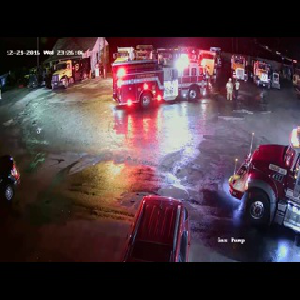

In [ ]:
images = glob.glob('/content/content/train_new/*')
print(images)
print(len(images))

test_data = np.array([img_to_array(load_img(img, target_size=(300, 300)))
                           for img in images
                      ]).astype('float32')
test_data /= 255


array_to_img(test_data[5])


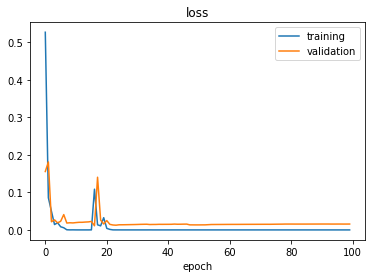

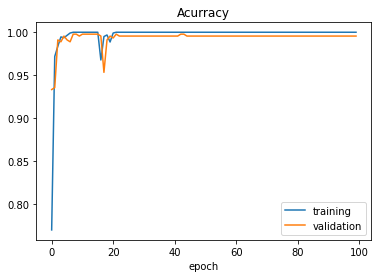

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
# score =history.evaluate(X_test,y_test,verbose=0)
# # print('Test Score:',score[0])
# print('Test Accuracy:',score[1])
# -------------------------------------------------------
# -------------------------------------------------------

# -------------------------------------------------------
# -------------------------------------------------------

prediction_images = base_inception.predict(test_data)
prediction_images = prediction_images.reshape(prediction_images.shape[0], 8 * 8, 2048)
prediction = model.predict_classes(prediction_images)
import operator
from sklearn.metrics import accuracy_score
accuracy_score(prediction, test_labels)*100

# -------------------------------------------------------
# -------------------------------------------------------

# -------------------------------------------------------
# -------------------------------------------------------

print(prediction)
print(test_labels)

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/weight_Xception_new.hdf5')

In [ ]:

prediction_images = base_inception.predict(test_data)
prediction_images = prediction_images.reshape(prediction_images.shape[0], 8 * 8, 2048)
prediction = model.predict_classes(prediction_images)
import operator
from sklearn.metrics import accuracy_score
accuracy_score(prediction, test_labels)*100

# -------------------------------------------------------
# -------------------------------------------------------

# -------------------------------------------------------
# -------------------------------------------------------

print(prediction)
print(test_labels)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0
 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0
 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1
 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0
 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1
 0 1 0 0 1 0]
[0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0
 0 0 0 0 1 

In [ ]:
prediction_images = base_inception.predict(test_data)
prediction_images = prediction_images.reshape(prediction_images.shape[0], 8 * 8, 2048)
prediction = model.predict_classes(prediction_images)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
confusion_matrix=metrics.confusion_matrix(test_labels,prediction)
confusion_matrix

array([[296,   4],
       [  1, 149]])

In [ ]:
auc_roc=metrics.roc_auc_score(test_labels,prediction)
auc_roc

0.9899999999999999

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels,prediction)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


0.9899999999999999

Text(0.5, 0, 'False Positive Rate')

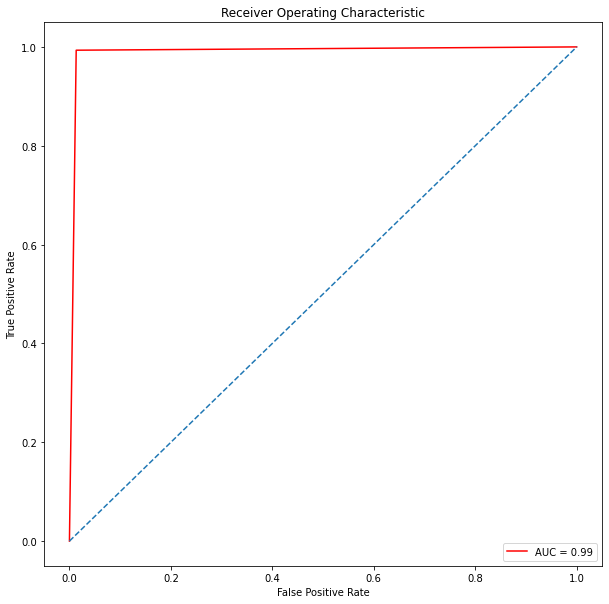

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(test_labels,prediction)

0.9675324675324676

In [ ]:
from sklearn.metrics import *
print(f1_score(test_labels,prediction, average='macro'))
print(f1_score(test_labels,prediction, average='micro'))
print(f1_score(test_labels,prediction, average=None))
print(cohen_kappa_score(test_labels,prediction,weights='quadratic'))
print(matthews_corrcoef(test_labels,prediction))



0.9875615702273746
0.9888888888888889
[0.99162479 0.98349835]
0.9751243781094527
0.9752330089100025


In [ ]:
from sklearn.metrics import classification_report
target_names = ['Normal', 'Abnormal']
print(classification_report(test_labels,prediction, target_names=target_names))

              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99       300
    Abnormal       0.97      0.99      0.98       150

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [ ]:
hinge_loss(test_labels,prediction)

0.6777777777777778

In [ ]:
log_loss(test_labels,prediction) #0.06671091451924945

0.3837712896983881

In [ ]:
fbeta_score(test_labels,prediction, average='macro', beta=0.5)

In [ ]:
fbeta_score(test_labels,prediction, average='micro', beta=0.5)

In [ ]:
 fbeta_score(test_labels,prediction, average='weighted', beta=0.5)

In [ ]:
recall_score(test_labels,prediction, average='macro')

In [ ]:
 mean_absolute_error(test_labels,prediction)

Threshold 0.419 achieves 0.9933 recall and 0.9739 precision




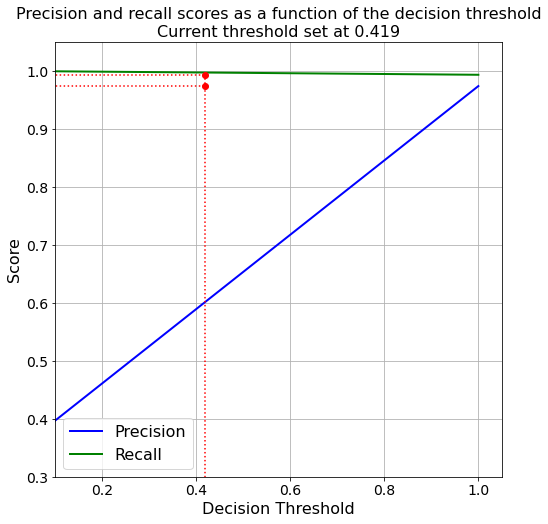